In [21]:
#https://colab.research.google.com/drive/1P9TPRWsDdqJC6IvOxjG2_3QlgCt59P0w?usp=sharing#scrollTo=XGsxbcqxIGJg
#https://www.youtube.com/watch?v=j3VNqtJUoz0&t=363s
#https://www.kaggle.com/code/taranmarley/vitransformer-step-by-step

In [22]:
#IMAGE PATCHING

from torchvision.transforms import Resize, ToTensor

transforms = [Resize((144, 144)), 
              ToTensor()] #les transfo effectués sur chaque image

class Compose(object): #transform image to the same sizes and transform to tensor
    def __init__(self, transforms) -> None:
        self.tansforms = transforms  #ou est la focntion transforms ?

    def __call__(self, *image, target) : #permet d'appeler objet comme des fonctions 
                                                        #exemple : si c = Compose()  -> on peut faire c() pour appeler cette focntion
        for t in self.transforms:  #pour chaque transfo dans transforms (ici on en a 2 - resize + ToTensor())
            print(t)
            image = t(image)
        return image, target
    
c = Compose(transforms)


In [23]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

#parameters 
height_image, width_image = 144, 144

class LeafDataset(Dataset):           #transform data #add labels 
    def __init__(self) -> None:
        super().__init__()

        self.path = "dataset/plant-pathology-2020-fgvc7"

        self.path_dir_X = os.path.join(self.path, 'images')

        self.path_Y = os.path.join(self.path, 'train.csv')
        self.dataframe_Y = pd.read_csv(self.path_Y)
        self.labels = self.dataframe_Y.loc[:, 'healthy':'scab']

        self.transform = A.Compose([
        #A.RandomResizedCrop(height=height_image, width=width_image, p=1.0), #au lieu de 500 - sinon le cpu ne suit pas - et kill tout les kernels python
        A.Resize(height=height_image, width=width_image),
        A.Rotate(20, p=1.0), 
        A.Flip(p=1.0),
        A.Transpose(p=1.0), 
        A.Normalize(p=1.0),  
        ToTensorV2(p=1.0),
        ], p=1.0)

        self.len = len(self.dataframe_Y)

    def __getitem__(self, index): #on defini le dataset et les transfo ici - car quand je vais appeller le dataloader - ca va parcourir toutes le simages donc passé par getitem
        img_name = self.dataframe_Y.loc[index, 'image_id']   #image_id,healthy,multiple_diseases,rust,scab
                                                             #Train_0,0,0,0,1      -> dans train.csv on a le nom du fichier ex : df[0]['image_id] = Train_0
        img_path = f"{self.path_dir_X}/{img_name}.jpg"
        image = plt.imread(img_path)

        image = self.transform(image = image)['image'] #resize / normalized / ....  #on prend ["image"] car renvoi un dictionnaire a la base 
        
        #test pour voir image de sorti
        #permute_transfo_image = image.permute(1, 2, 0)   #pour pouvoir l'afficher en plotlib
        #plt.imshow(permute_transfo_image)
        #plt.show()

        label = torch.tensor(np.argmax(self.labels.loc[index,:].values))  #on obtient la label avec argmax
        #print(f'label : {label}')   #maintenant on aplus que la label et plus le tableau 
                                    #on peut maitnent calculer une loss - on pouvait pas avant avec array : tensor([0, 0, 1, 0])

        return image, label
    
    def __len__(self):
        return self.len

In [24]:
# Création de l'instance du dataset
leaf_dataset = LeafDataset()

In [25]:
len(leaf_dataset[0])   #2 elements dans le tuple de chaque elements 

2

In [26]:
leaf_dataset[0][0] #l'image du premier element - index 0

tensor([[[ 0.5536,  0.3823,  0.3138,  ..., -0.6109, -0.9020, -1.0562],
         [ 0.4337,  0.4166,  0.4166,  ..., -0.7822, -0.9705, -1.0562],
         [ 0.1939,  0.2967,  0.3652,  ..., -0.8849, -1.0390, -1.0733],
         ...,
         [-1.6384, -1.6555, -1.6384,  ...,  0.5878,  0.5364,  0.5022],
         [-1.5870, -1.5870, -1.5699,  ...,  0.5364,  0.4851,  0.4679],
         [-1.5528, -1.5357, -1.5528,  ...,  0.5022,  0.4508,  0.4166]],

        [[ 0.8880,  0.8004,  0.7304,  ..., -0.0574, -0.3550, -0.5476],
         [ 0.8004,  0.8529,  0.9405,  ..., -0.2325, -0.4601, -0.5826],
         [ 0.7304,  0.7829,  0.8354,  ..., -0.3725, -0.5651, -0.6001],
         ...,
         [-1.4755, -1.4930, -1.4755,  ...,  0.1877,  0.2052,  0.1877],
         [-1.3704, -1.3880, -1.3880,  ...,  0.1527,  0.1352,  0.1352],
         [-1.3179, -1.3179, -1.3179,  ...,  0.1527,  0.1001,  0.0826]],

        [[-0.4798, -0.6367, -0.7413,  ..., -1.2293, -1.3513, -1.4384],
         [-0.5844, -0.6367, -0.7936,  ..., -1

In [27]:
leaf_dataset[0][1] #la classe du premier element - index 0

tensor(3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


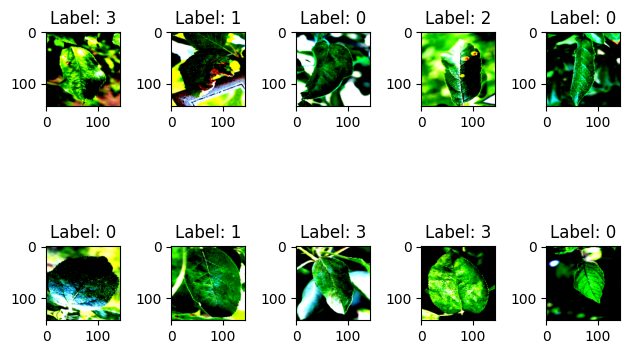

In [28]:
from torch.utils.data import DataLoader

# Création de l'instance du dataset
leaf_dataset = LeafDataset()

# Création d'un DataLoader pour charger les données
batch_size = 10
data_loader = DataLoader(leaf_dataset, batch_size=batch_size, shuffle=False)

# Affichage des 10 premières images
num_displayed = 0
for batch_idx, (images, labels) in enumerate(data_loader):
    for i in range(len(images)):
        # Afficher l'image
        plt.subplot(2, 5, num_displayed + 1)
        plt.imshow(images[i].permute(1, 2, 0))  # Assurez-vous que les dimensions sont dans l'ordre attendu pour Matplotlib
        plt.title(f"Label: {labels[i]}")
        #plt.axis('off')
        num_displayed += 1
        
        if num_displayed == 10:
            break
    if num_displayed == 10:
        break

plt.tight_layout()
plt.show()

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check for GPU availability

In [30]:
#A positional encoding layer is used to add data to each patch that encodes its position
# so that the network can determine that a patch came from the top left of the picture of from the center.
import torch
import matplotlib.pyplot as plt

def PositionalEncoding(sequence_len, output_dim, n=10000):
    P = torch.zeros((sequence_len, output_dim))
    for k in range(sequence_len):
        for i in range(0, output_dim, 2):
            denominator = torch.tensor(n, dtype=torch.float).pow(2 * i / output_dim)
            P[k, i] = torch.sin(k / denominator)
            P[k, i + 1] = torch.cos(k / denominator)
    return P

In [31]:
from torch import nn

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, emb_size):
        super().__init__()

        self.img_size = img_size
        self.patch_size = patch_size

        self.n_patches = (img_size // patch_size) * (img_size // patch_size)


        self.patch_embedding = nn.Sequential(
            nn.Conv2d(in_channels, out_channels = self.n_patches, kernel_size=patch_size, stride=patch_size), 
                                            # image -> réduite a partir de convolution 
                                            # out_channels = self.n_patches    - on passe de 144*144 pixels a self.n_patches ici 18 *18
                                            #kernel_size  patch size -> comme ca on va mapeer dans l'espace vectoriell l'image - par rapport a ces patch  - donc le kernel resume le patch en une valeur - c'est pour ca qu'on aplique kernel_size = patch_size
                                            #stride c'est le pas - donc si = kerbel size -> on aura pas de chevauchement
        
            nn.Flatten(start_dim=2), #1ere dimenson = taille du batch  - donc on commence a 2 
            nn.Linear(self.n_patches, emb_size) 
                                            #Flat -> transfo en sequence
                                            #n_patches -> emb_size     - on reduit le vecteur a la taille de emb size = tailled de chaque vector representatif d'image
        )
        
        
        self.cls_token = nn.Parameter(torch.zeros(1, 1, emb_size))
                                #classifier token

        self.pos_encoding = PositionalEncoding(sequence_len=self.n_patches, output_dim=emb_size)
                        #output_dim = dimension de l'encodage de position
                        #doit etre = dimension de sortie de la convolution du patch embeding

    def forward(self, x):
        #x = input image
        
        B, C, H, W = x.shape #batch size, channels, height, and width of the input image

        x = self.patch_embedding(x) #patch embeding layer
        #print(x.shape)

        x = x + self.pos_encoding.to(device)  # Apply positional encoding

        # Add class token
        cls_tokens = self.cls_token.expand(B, -1, -1) # Expand class token for each item in the batch
        x = torch.cat((cls_tokens, x), dim=1) # Shape: [B, n_patches+1, emb_size]

        

        return x

# Test Patch Embedding Code
sample_datapoint = torch.unsqueeze(leaf_dataset[0][0], 0).to(device) 
print("Initial shape: ", sample_datapoint.shape)

model = PatchEmbedding(img_size=144, patch_size=8, in_channels=3, emb_size=64)
model.to(device)
embedding = model(sample_datapoint)
print("Patches shape: ", embedding.shape)

Initial shape:  torch.Size([1, 3, 144, 144])
Patches shape:  torch.Size([1, 325, 64])


In [32]:
class Attention(nn.Module):
    def __init__(self, dim, n_heads):
        super().__init__()
        self.n_heads = n_heads
        self.att = torch.nn.MultiheadAttention(embed_dim=dim,
                                               num_heads=n_heads)
        self.q = torch.nn.Linear(dim, dim)
        self.k = torch.nn.Linear(dim, dim)
        self.v = torch.nn.Linear(dim, dim)

    def forward(self, x):
        q = self.q(x)
        k = self.k(x)
        v = self.v(x)
        attn_output, attn_output_weights = self.att(x, x, x)
        return attn_output

In [33]:
#partie gauche (encoder) de l'architexture d'un transformer

class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_dim):
        super().__init__()

        self.attention = Attention(embed_dim,num_heads)
        self.norm1 = nn.LayerNorm(embed_dim) # first layer normalization - pour la premiere connexion résiduel

        self.mlp = nn.Sequential(  #MLP -> feed-forward layer
            nn.Linear(embed_dim, mlp_dim),
            nn.GELU(),
            nn.Linear(mlp_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim) #  second layer normalization - connexion résiduel aprés le MLP

        self.dropout = nn.Dropout(0.1) #dropout layer to prevent overfitting during training

    def forward(self, x):
        attn_out = self.attention(x)

        x = x + self.dropout(attn_out)  #dropout pour eviter overfiting    #ADD
        x = self.norm1(x)  #1ere normalisation                             #& NORM

        mlp_out = self.mlp(x)                                              #FEED-FORWARD

        x = x + self.dropout(mlp_out)                                      #ADD
        x = self.norm2(x) #2eme normalisation                              #& NORM

        return x

In [34]:
class VisionTransformer(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim, num_heads, mlp_dim, num_layers, num_classes, device):
        super().__init__()

        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)

        self.transformer_encoders = nn.Sequential( #-> création de la qéquance d'encoder        -> num_layers = num encoders
            *[TransformerEncoder(embed_dim, num_heads, mlp_dim) for _ in range(num_layers)]
        )

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim)) #class token pour l'image en input 

        self.norm = nn.LayerNorm(embed_dim) #final layer normalization to stabilize the output of the Transformer Encoder layers

        # Define the classification head, which is a linear layer that maps the class token to the number of output classes
        self.head = nn.Linear(embed_dim, num_classes)   

    def forward(self, x):
        x = self.patch_embed(x)  #embed de l'image input 

        x = self.transformer_encoders(x) #image dasn la séquence de transformer

        cls_token = x[:, 0] # Extract the class token from the output sequence

        cls_token = self.norm(cls_token) # Apply layer normalization to the class token

        logits = self.head(cls_token) # Pass the class token through the classification head to compute the logits for each class

        return logits

In [35]:
train_loader = DataLoader(leaf_dataset, batch_size=64, shuffle=True)

In [36]:
print(device)

cuda


In [37]:
model = VisionTransformer(
    img_size=144,
    patch_size=12,
    in_channels=3,
    embed_dim=128,
    num_heads=64,
    mlp_dim=128,
    num_layers=6,
    num_classes=4,
    device=device
).to(device)

In [38]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR

# Number of epochs (dataset entier)
epochs = 10000


criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)
scheduler = OneCycleLR(optimizer, max_lr=3e-4, total_steps=int(((len(leaf_dataset) - 1) // batch_size + 1) * epochs))



In [39]:
def train(model, dataloader, criterion, optimizer, device):
    model.train()  #training mode 
    
    total_loss = 0
    correct = 0  

    for batch_idx, (data, target) in enumerate(dataloader):      # -> each batch in the dataloader

        data, target = data.to(device), target.to(device)  
        optimizer.zero_grad()  
        
        output = model(data) # Forward pass
        loss = criterion(output, target) 
        
        loss.backward() 
        total_loss += loss.item()  
        pred = output.argmax(dim=1, keepdim=True)  
        optimizer.step() 
        scheduler.step()
        correct += pred.eq(target.view_as(pred)).sum().item()  
        
        
    return total_loss / len(dataloader.dataset), correct / len(dataloader.dataset)

In [40]:
train_losses = []

# Training loop
for epoch in range(epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device)
    
    train_losses.append(train_loss)
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.8f}, Train Accuracy: {train_accuracy:.8f}")

    if epoch%30 == 0:
        model_checkpoint = os.path.join("saved_models", f"model_epoch{epoch+1}.pt")
        torch.save(model.state_dict(), model_checkpoint)

Epoch 1/10000, Train Loss: 0.02051055, Train Accuracy: 0.33058759
Epoch 2/10000, Train Loss: 0.02005669, Train Accuracy: 0.31356398
Epoch 3/10000, Train Loss: 0.01978035, Train Accuracy: 0.33113674
Epoch 4/10000, Train Loss: 0.01998435, Train Accuracy: 0.32235036
Epoch 5/10000, Train Loss: 0.01991075, Train Accuracy: 0.31740802
Epoch 6/10000, Train Loss: 0.01997248, Train Accuracy: 0.33333333
Epoch 7/10000, Train Loss: 0.01989841, Train Accuracy: 0.33168589
Epoch 8/10000, Train Loss: 0.01989586, Train Accuracy: 0.32894014
Epoch 9/10000, Train Loss: 0.01986245, Train Accuracy: 0.33552993
Epoch 10/10000, Train Loss: 0.01994103, Train Accuracy: 0.30422845
Epoch 11/10000, Train Loss: 0.01978873, Train Accuracy: 0.34541461
Epoch 12/10000, Train Loss: 0.01991910, Train Accuracy: 0.31301483
Epoch 13/10000, Train Loss: 0.01978646, Train Accuracy: 0.35529929
Epoch 14/10000, Train Loss: 0.01987492, Train Accuracy: 0.31795717
Epoch 15/10000, Train Loss: 0.01977835, Train Accuracy: 0.33662823
Epoc

KeyboardInterrupt: 

In [1]:
#loss graph

x = []
for i in range(len(train_losses)):
    x.append((i + 1))

plt.plot(x, train_losses, label='Train Loss') 

plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title('Loss Graph')
plt.legend()
plt.show()

NameError: name 'train_losses' is not defined

In [42]:
# Get bad predictions
count_bad = 0  

bad_inputs = []
bad_input_predictions = []
bad_input_labels = []

for inputs, labels in train_loader:
    for i in range(len(inputs)):
        model.eval()  #evaluation mode
        output = model(inputs[i].unsqueeze(0).to(device)) # Forward pass
        # Get the index of the highest predicted probability (predicted class)
        predicted = torch.argmax(output, dim=1)

        if (predicted.item() != labels[i].item()): #if incorrect 
            bad_inputs.append(inputs[i])
            bad_input_predictions.append(predicted.item())
            bad_input_labels.append(labels[i].item())

In [43]:
print(len(bad_inputs))

1199


In [44]:
print(len(leaf_dataset))

1821
